In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
os.getcwd()

'/Users/Nicole/Documents/680AppliedDS'

In [4]:
path = '/Users/Nicole/Documents/680AppliedDS/dog_images'

In [5]:
breed_name=[]
for file in os.listdir(path):
    breed_name+=[file]
    
print(breed_name)
print('Number of breeds:', + len(breed_name))

['.DS_Store', 'Bugg dog', 'Akita dog', 'Alaskan Malamute dog', 'Bocker dog', 'Beagle dog', 'Boxer dog', 'Bichon Frise dog', 'Affenhuahua dog', 'American Bulldog dog', 'Borzoi dog', 'Auggie dog', 'Afgan Hound dog', 'Belgian Tervuren dog', 'Bulldog dog']
Number of breeds: 15


In [6]:
# file not on computer and not part of data so we need to remove

os.remove('/Users/Nicole/Documents/680AppliedDS/dog_images/.DS_Store')

In [7]:
breed_name=[]
for file in os.listdir(path):
    breed_name+=[file]
    
print(breed_name)
print('Number of breeds:', + len(breed_name))

['Bugg dog', 'Akita dog', 'Alaskan Malamute dog', 'Bocker dog', 'Beagle dog', 'Boxer dog', 'Bichon Frise dog', 'Affenhuahua dog', 'American Bulldog dog', 'Borzoi dog', 'Auggie dog', 'Afgan Hound dog', 'Belgian Tervuren dog', 'Bulldog dog']
Number of breeds: 14


In [8]:
Name=[]
for i in range(len(breed_name)):
    Name+=[i]

In [9]:
mapping=dict(zip(breed_name,Name)) 
reverse_mapping=dict(zip(Name,breed_name))

In [10]:
def mapper(value):
    return reverse_mapping[value]

In [11]:
data1=[]
data2=[]
count=0

In [12]:
for file in os.listdir(path):
    file_path=os.path.join(path,file)
    t=0
    for im in os.listdir(file_path):
        image=load_img(os.path.join(file_path,im), grayscale=False, color_mode='rgb', target_size=(180,180))
        image=img_to_array(image)
        image=image/255.0
        if t<=20:
            data1+=[[image,count]]
        else:
            data2+=[[image,count]]
        t+=1
    count=count+1

In [13]:
data,labels0=zip(*data1)
test,testlabels0=zip(*data2)

In [14]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [15]:
data=np.array(data)
test=np.array(test)
x_train, x_test, y_train, y_test = train_test_split(data,labels,test_size=0.2,random_state=44)

In [16]:
data_generator = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [17]:
pretrained_model = tf.keras.applications.DenseNet201(input_shape=(180,180,3),
                                                     include_top=False,
                                                     weights='imagenet',
                                                     pooling='avg')
pretrained_model.trainable = False

74842112/74836368 [==============================] - 34s 0us/step


In [18]:
inputs = pretrained_model.input
x_layers = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(14, activation='softmax')(x_layers)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit(data_generator.flow(x_train,
                                 y_train,
                                 batch_size=32),
                    validation_data=(x_test,
                                     y_test),
                    epochs=30)

Epoch 1/30
8/8 [==============================] - 61s 7s/step - loss: 3.1185 - accuracy: 0.1064 - val_loss: 2.6181 - val_accuracy: 0.1864
Epoch 2/30
8/8 [==============================] - 42s 6s/step - loss: 2.3545 - accuracy: 0.2806 - val_loss: 2.1987 - val_accuracy: 0.3729
Epoch 3/30
8/8 [==============================] - 40s 5s/step - loss: 1.9380 - accuracy: 0.4165 - val_loss: 1.9727 - val_accuracy: 0.3390
Epoch 4/30
8/8 [==============================] - 40s 5s/step - loss: 1.7204 - accuracy: 0.4769 - val_loss: 1.9145 - val_accuracy: 0.4915
Epoch 5/30
8/8 [==============================] - 38s 5s/step - loss: 1.4662 - accuracy: 0.5685 - val_loss: 1.7632 - val_accuracy: 0.4746
Epoch 6/30
8/8 [==============================] - 39s 5s/step - loss: 1.3784 - accuracy: 0.5947 - val_loss: 1.7196 - val_accuracy: 0.5424
Epoch 7/30
8/8 [==============================] - 38s 5s/step - loss: 1.1526 - accuracy: 0.6475 - val_loss: 1.7615 - val_accuracy: 0.4746
Epoch 8/30
8/8 [==================

In [22]:
y_pred = model.predict(x_test)
pred = np.argmax(y_pred,axis=1)
ground = np.argmax(y_test,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.60      0.75         5
           2       0.67      0.86      0.75         7
           3       0.00      0.00      0.00         2
           4       0.25      0.25      0.25         4
           5       0.25      0.33      0.29         3
           6       0.50      0.50      0.50         4
           7       1.00      0.50      0.67         4
           8       0.60      0.75      0.67         4
           9       0.60      1.00      0.75         3
          10       0.78      1.00      0.88         7
          11       0.80      1.00      0.89         4
          12       0.00      0.00      0.00         3
          13       0.33      0.25      0.29         4

    accuracy                           0.61        59
   macro avg       0.56      0.55      0.53        59
weighted avg       0.62      0.61      0.59        59



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

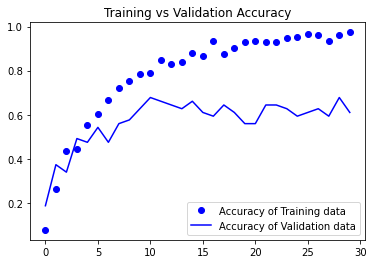

<Figure size 432x288 with 0 Axes>

In [25]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Accuracy of Training data')
plt.plot(epochs, val_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

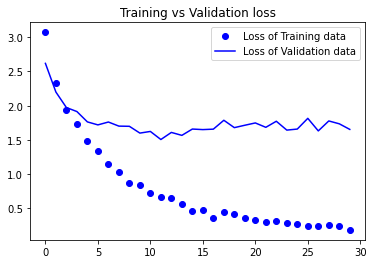

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, loss, 'bo', label='Loss of Training data')
plt.plot(epochs, val_loss, 'b', label='Loss of Validation data')
plt.title('Training vs Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [37]:
# first image prediction
image=load_img("/Users/Nicole/Documents/680AppliedDS/dog_images/Belgian Tervuren dog/Image_8.jpg",
               target_size=(180,180))

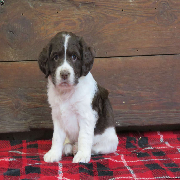

In [38]:
image

In [30]:
image=img_to_array(image) 
image=image/255.0
pred_image=np.array(image)
pred_image= np.expand_dims(image, axis=0)

In [31]:
pred=model.predict(pred_image)
value=np.argmax(pred)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is Belgian Tervuren dog.


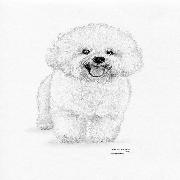

In [39]:
# second image prediciton
image2=load_img("/Users/Nicole/Documents/680AppliedDS/dog_images/Bichon Frise dog/Image_49.jpg",
               target_size=(180,180))
image2

In [40]:
image2=img_to_array(image2) 
image2=image2/255.0
pred_image=np.array(image2)
pred_image= np.expand_dims(image2, axis=0)

In [41]:
pred=model.predict(pred_image)
value=np.argmax(pred)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is Bichon Frise dog.


In [42]:
# image of a cat to see how the model will predict
cat_image = load_img("/Users/Nicole/Documents/680AppliedDS/dog_images/cat.jpeg",
                     target_size = (180, 180))

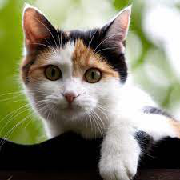

In [43]:
cat_image

In [44]:
image=img_to_array(cat_image) 
image=image/255.0
pred_image=np.array(image)
pred_image= np.expand_dims(image, axis=0)

In [45]:
pred=model.predict(pred_image)
value=np.argmax(pred)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is Bulldog dog.
